In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mp
import os
import csv
import seaborn as sns
sns.set()

In [2]:
fileVelocityDalles = "Data/velocityDalles.csv"

velocityDal_df = pd.read_csv(fileVelocityDalles)

tempVelocityDal_df = pd.DataFrame(velocityDal_df[27:])


In [3]:
tempVelocityDal_df = tempVelocityDal_df.rename(columns={"# ---------------------------------- WARNING ----------------------------------------":"Outfit",
                                                          "Unnamed: 1": "Station ID",
                                                          "Unnamed: 2": "Date/Time",
                                                          "Unnamed: 3": "Timezone",
                                                          "Unnamed: 4": "Mean Velocity (Ft./s)",
                                                          "Unnamed: 5": "Approval Code"}) 

new = tempVelocityDal_df["Date/Time"].str.split(" ", n=1, expand = True)

tempVelocityDal_df["Date"]= new[0]
tempVelocityDal_df["Time"]= new[1]

#tempVelocityDal_df.drop(columns = ["Date/Time"], inplace = True)

tempVelocityDal_df['Date'] = pd.to_datetime(tempVelocityDal_df['Date']).dt.strftime('%Y/%m/%d')


In [4]:
tempVelocityDal_df["Mean Velocity (Ft./s)"] = tempVelocityDal_df["Mean Velocity (Ft./s)"].astype(float)
tempVelocityDal_df["Mean Velocity (m/s)"] = tempVelocityDal_df["Mean Velocity (Ft./s)"] * 0.3048

#tempVelocityDal_df

In [7]:
eventDate = tempVelocityDal_df.groupby("Date")

dayAverageVel = eventDate["Mean Velocity (m/s)"].mean()

eventDate_df = pd.DataFrame({"Velocity Average Columbia River (m/s)": dayAverageVel})

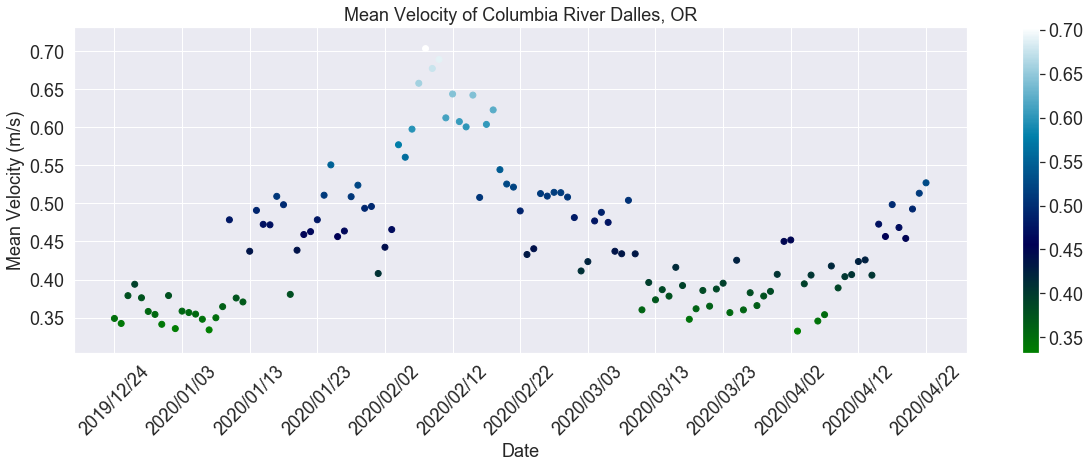

In [13]:
eventDate_df["Time"] = eventDate_df.index
x_axis = np.arange(len(eventDate_df['Time']))
tick_locations = [value for value in x_axis]
labels = eventDate_df.index

y = eventDate_df["Velocity Average Columbia River (m/s)"]

cm = mp.cm.get_cmap('ocean')

plt.figure(figsize=(20,6))
sc = plt.scatter(x_axis,y, c=y, cmap=cm)
plt.xticks(tick_locations[::10], labels[::10], rotation=45)
plt.colorbar(sc)
plt.xlabel("Date", fontsize=18) 
plt.ylabel("Mean Velocity (m/s)", fontsize=18)              
plt.title('Mean Velocity of Columbia River Dalles, OR', fontsize=18)        
mp.rc('xtick', labelsize=18) 
mp.rc('ytick', labelsize=18)            
plt.savefig('images/velocityColumbia.png', bbox_inches="tight", pad_inches=0.2)
plt.show()